In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [91]:
def preprocessing(df, old_name, new_name):
    '''
    Preprocesses data for a location
    '''
    df = df.sort_values(by='created_at',ascending=True)
    df = df.set_index('created_at')
    hourly_df = df.resample('H').mean()
    hourly_df.dropna(inplace=True)
    hourly_df = hourly_df.rename(columns={old_name:new_name})
    return hourly_df

In [92]:
def merge_dfs(df_list):
    '''
    Merges several dataframes into one based on the index
    '''
    from functools import reduce
    final_df = reduce(lambda left,right: pd.merge(left,right,on='created_at'), df_list)
    return final_df

In [93]:
def correlation_matrix(df):
    '''
    Generates correlation matrix
    '''
    return df.corr()

In [94]:
def heat_map(df, title):
    import seaborn as sns
    
    plt.figure(figsize=(9,9))
    plt.title(title)
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.savefig('local_sources_correlation.png')
    plt.show()

In [95]:
local_data = pd.read_csv('./background vs local/stats_table_local_sources_30_09_2020.csv')
local_data.head()

,Parish,Latitude,Longitude,Minimum,Maximum,Mean PM 2.5,Median PM 2.5,25th Percentile,75th Percentile
0,Nakasero II(2),0.322320,32.575700,0.2,153.7,8.6,6.3,4.2,10.1
1,Kansanga,0.298750,32.615000,0.2,108.9,6.8,5.1,3.3,8.3
2,Nansana East,0.375900,32.528000,0.0,242.3,17.9,11.9,7.5,20.5
3,Lubaga,0.295314,32.553682,0.2,652.8,18.7,13.2,8.7,21.5
4,Nansana West,0.363000,32.529000,1.4,219.6,16.3,10.2,6.7,19.0


In [96]:
import os
local_df_list = []
for parish in local_data.Parish:
    for f in os.listdir('background vs local/'):
        if parish+'.csv' in f:
            filepath = 'background vs local/'+f
    location_df = pd.read_csv(filepath, usecols = ['created_at', 'local_sources'], parse_dates =['created_at'])
    preprocessed_df = preprocessing(location_df, 'local_sources', parish.lower().replace(' ', '_'))
    local_df_list.append(preprocessed_df)
    print(parish, ':done')

Nakasero II(2) :done
Kansanga :done
Nansana East :done
Lubaga :done
Nansana West :done
Lukuli(2) :done
Bugolobi :done
Kyaliwajjala :done
Seguku :done
Kiwafu :done
Kiwatule :done
Civic Centre :done
Makindye I :done


In [97]:
local_df_list[5].head()

,lukuli(2)
created_at,
2020-02-14 00:00:00+00:00,6.411163
2020-02-14 01:00:00+00:00,4.267955
2020-02-14 02:00:00+00:00,1.830976
2020-02-14 03:00:00+00:00,3.042857
2020-02-14 04:00:00+00:00,4.583182


In [98]:
local_merged_df = merge_dfs(local_df_list)
local_merged_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
created_at,,,,,,,,,,,,,
2020-02-14 00:00:00+00:00,8.934884,7.242045,12.982558,6.586279,13.273659,6.411163,10.209070,14.338333,9.215349,6.340000,6.402326,4.683409,7.430000
2020-02-14 01:00:00+00:00,5.954878,6.799512,13.728571,7.540244,10.280250,4.267955,4.356279,5.356512,4.063182,6.224500,5.368837,4.838372,3.262326
2020-02-14 02:00:00+00:00,4.448140,2.694773,11.910714,13.314390,24.012558,1.830976,3.597273,2.866098,10.318605,3.879444,3.343488,6.137027,19.084634
2020-02-14 03:00:00+00:00,5.203171,5.169767,14.332000,53.040000,170.213256,3.042857,4.408182,6.334146,12.268372,6.546389,7.072326,6.398108,9.672727
2020-02-14 04:00:00+00:00,3.343659,2.775349,165.743864,36.889756,32.642791,4.583182,2.193864,10.488810,4.813023,7.841250,42.566744,10.502121,6.238140


In [99]:
local_merged_df.shape

(2753, 13)

In [100]:
local_corr_df = correlation_matrix(local_merged_df)
local_corr_df

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
nakasero_ii(2),1.000000,0.366668,0.219845,0.151268,0.156596,0.378441,0.389416,0.087910,0.202817,0.063090,0.154757,0.336731,0.361650
kansanga,0.366668,1.000000,0.231624,0.143097,0.159861,0.516671,0.588295,0.117843,0.154876,0.087100,0.210774,0.353521,0.411831
nansana_east,0.219845,0.231624,1.000000,0.165817,0.225782,0.255443,0.206492,0.131862,0.179398,0.117178,0.179396,0.241585,0.269262
lubaga,0.151268,0.143097,0.165817,1.000000,0.175400,0.159932,0.157103,0.101735,0.147189,0.097769,0.180261,0.199102,0.156096
nansana_west,0.156596,0.159861,0.225782,0.175400,1.000000,0.192472,0.174898,0.113313,0.198875,0.117688,0.132869,0.209929,0.271245
lukuli(2),0.378441,0.516671,0.255443,0.159932,0.192472,1.000000,0.482430,0.137628,0.215161,0.156041,0.163819,0.365293,0.571062
bugolobi,0.389416,0.588295,0.206492,0.157103,0.174898,0.482430,1.000000,0.124516,0.166556,0.128976,0.216520,0.367922,0.386437
kyaliwajjala,0.087910,0.117843,0.131862,0.101735,0.113313,0.137628,0.124516,1.000000,0.096287,0.088149,0.077103,0.115711,0.157577
seguku,0.202817,0.154876,0.179398,0.147189,0.198875,0.215161,0.166556,0.096287,1.000000,0.110089,0.124469,0.239969,0.229568
kiwafu,0.063090,0.087100,0.117178,0.097769,0.117688,0.156041,0.128976,0.088149,0.110089,1.000000,0.063696,0.093901,0.146529


In [101]:
rounded_df =local_corr_df.round(decimals=3)
rounded_df.to_csv('local_sources_pairwise_correlation.csv')
rounded_df

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
nakasero_ii(2),1.000,0.367,0.220,0.151,0.157,0.378,0.389,0.088,0.203,0.063,0.155,0.337,0.362
kansanga,0.367,1.000,0.232,0.143,0.160,0.517,0.588,0.118,0.155,0.087,0.211,0.354,0.412
nansana_east,0.220,0.232,1.000,0.166,0.226,0.255,0.206,0.132,0.179,0.117,0.179,0.242,0.269
lubaga,0.151,0.143,0.166,1.000,0.175,0.160,0.157,0.102,0.147,0.098,0.180,0.199,0.156
nansana_west,0.157,0.160,0.226,0.175,1.000,0.192,0.175,0.113,0.199,0.118,0.133,0.210,0.271
lukuli(2),0.378,0.517,0.255,0.160,0.192,1.000,0.482,0.138,0.215,0.156,0.164,0.365,0.571
bugolobi,0.389,0.588,0.206,0.157,0.175,0.482,1.000,0.125,0.167,0.129,0.217,0.368,0.386
kyaliwajjala,0.088,0.118,0.132,0.102,0.113,0.138,0.125,1.000,0.096,0.088,0.077,0.116,0.158
seguku,0.203,0.155,0.179,0.147,0.199,0.215,0.167,0.096,1.000,0.110,0.124,0.240,0.230
kiwafu,0.063,0.087,0.117,0.098,0.118,0.156,0.129,0.088,0.110,1.000,0.064,0.094,0.147


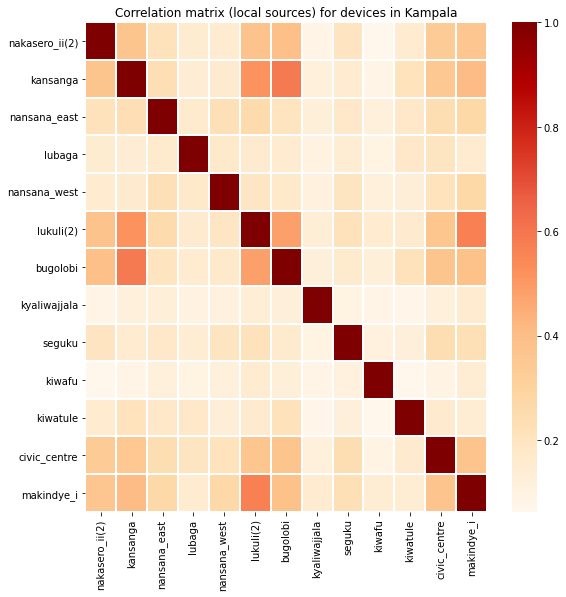

In [102]:
heat_map(rounded_df, 'Correlation matrix (local sources) for devices in Kampala')

In [103]:
local_merged_df.to_csv('local_sources_merged_data.csv', index=False)

In [104]:
local_merged_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
created_at,,,,,,,,,,,,,
2020-02-14 00:00:00+00:00,8.934884,7.242045,12.982558,6.586279,13.273659,6.411163,10.209070,14.338333,9.215349,6.340000,6.402326,4.683409,7.430000
2020-02-14 01:00:00+00:00,5.954878,6.799512,13.728571,7.540244,10.280250,4.267955,4.356279,5.356512,4.063182,6.224500,5.368837,4.838372,3.262326
2020-02-14 02:00:00+00:00,4.448140,2.694773,11.910714,13.314390,24.012558,1.830976,3.597273,2.866098,10.318605,3.879444,3.343488,6.137027,19.084634
2020-02-14 03:00:00+00:00,5.203171,5.169767,14.332000,53.040000,170.213256,3.042857,4.408182,6.334146,12.268372,6.546389,7.072326,6.398108,9.672727
2020-02-14 04:00:00+00:00,3.343659,2.775349,165.743864,36.889756,32.642791,4.583182,2.193864,10.488810,4.813023,7.841250,42.566744,10.502121,6.238140


In [105]:
rounded_df.shape

(13, 13)